In [1]:
import cv2
import pydicom 
from pydicom import dcmread
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import nibabel as nib
from random import sample

In [2]:
#and stack them together vertically using np.vstack()
non_covid_dataset_arr=[]
for filename in os.listdir('/home/royal/PycharmProjects/learningML/venv/DCM_files'):
    file_path=os.path.join('/home/royal/PycharmProjects/learningML/venv/DCM_files', filename)
    data= pydicom.dcmread(file_path)
    non_covid_dataset_arr.append(cv2.resize(data.pixel_array,(128,128)).flatten())
    
non_covid_dataset_arr = np.array(non_covid_dataset_arr)

In [5]:
non_covid_dataset_arr.shape

(395, 16384)

In [6]:
uarray = np.random.choice(np.arange(0, 395), replace=False, size=(300))


In [7]:
non_covid_images=[]
for i in uarray:
    non_covid_images.append(non_covid_dataset_arr[i])
    
non_covid_images =np.array(non_covid_images)

In [8]:
nc_images_df=pd.DataFrame(non_covid_images)
nc_images_df

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
1,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
2,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
3,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
4,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
296,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
297,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048
298,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048


In [24]:
nc_images_df['label']=np.full(300,0)
nc_images_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
1,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
2,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
3,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
4,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
296,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
297,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0
298,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,...,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,0


In [9]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [11]:
path = '/home/royal/COVID-19-CT-Seg_20cases'
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and 
         'coronacase' in i]

In [12]:
sorted(files)


['coronacases_001.nii',
 'coronacases_002.nii',
 'coronacases_003.nii',
 'coronacases_004.nii',
 'coronacases_005.nii',
 'coronacases_006.nii',
 'coronacases_007.nii',
 'coronacases_008.nii',
 'coronacases_009.nii',
 'coronacases_010.nii']

In [13]:
covid_indices = np.random.choice(np.arange(0, 200), replace=False, size=(30))

In [20]:
from random import sample
covid_dataset_arr=[]
size_x = 128
size_y = 128

indices = sample(range(0, 200),30)
for filename in files:
        file_path=os.path.join(path, filename)
        covid_data= read_nii(file_path)
        print(covid_data.shape)
        for i in indices:
            covid_dataset_arr.append(cv2.resize(covid_data[:,:,i],(128,128)).flatten())
    
covid_dataset_arr=np.array(covid_dataset_arr)
covid_dataset_arr.shape
    

(512, 512, 270)
(512, 512, 200)
(512, 512, 301)
(512, 512, 213)
(512, 512, 249)
(512, 512, 290)
(512, 512, 256)
(512, 512, 301)
(512, 512, 301)
(512, 512, 200)


(300, 16384)

In [25]:
covid_df= pd.DataFrame(covid_dataset_arr)
covid_df['label']=np.full(300,1)



In [26]:
covid_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-1000.25,-993.00,-994.25,-1001.00,-990.25,-1003.00,-993.50,-983.50,-990.50,-1001.75,...,-984.75,-1009.00,-987.00,-988.50,-988.25,-985.75,-981.50,-998.25,-999.0,1
1,-991.00,-991.50,-1002.00,-988.75,-985.75,-1009.50,-998.50,-999.50,-1006.25,-993.75,...,-1002.50,-1001.00,-989.50,-989.75,-983.00,-984.50,-990.25,-993.50,-999.0,1
2,-986.75,-983.75,-1003.00,-997.75,-999.75,-989.75,-986.25,-1001.75,-993.00,-991.75,...,-997.50,-1010.50,-997.25,-1002.25,-999.75,-991.50,-998.50,-997.00,-998.0,1
3,-988.25,-1007.25,-983.75,-993.00,-1003.75,-995.75,-996.50,-992.75,-997.25,-994.50,...,-999.50,-998.25,-1012.75,-992.00,-996.75,-997.50,-998.25,-998.50,-998.0,1
4,-990.50,-1001.50,-990.75,-989.00,-992.00,-1000.25,-991.50,-1005.50,-988.00,-994.50,...,-1000.25,-993.25,-994.00,-984.50,-1002.50,-997.50,-1002.25,-1004.75,-998.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1001.00,-1001.00,-1001.00,-1001.00,-1001.00,-1001.00,-1001.00,-1000.00,-1000.00,-1000.00,...,-1000.75,-1008.50,-993.75,-1003.75,-977.25,-1001.50,-1001.00,-1001.00,-1001.0,1
296,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.50,-1000.75,...,-988.75,-1000.25,-1005.50,-995.00,-991.75,-1001.75,-1001.00,-1001.00,-1001.0,1
297,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1001.00,-1001.00,-1001.00,-1001.00,-1000.75,...,-993.25,-987.75,-994.00,-1007.75,-997.50,-1000.75,-1000.00,-1000.00,-1000.0,1
298,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,-1000.00,...,-989.50,-1007.25,-1010.50,-991.00,-998.50,-1000.25,-1000.00,-1000.00,-1000.0,1


In [28]:
final_df=pd.concat([covid_df, nc_images_df],axis=0,ignore_index=True)

In [50]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-1000.25,-993.00,-994.25,-1001.00,-990.25,-1003.00,-993.50,-983.50,-990.50,-1001.75,...,-984.75,-1009.00,-987.00,-988.50,-988.25,-985.75,-981.50,-998.25,-999.0,Covid
1,-991.00,-991.50,-1002.00,-988.75,-985.75,-1009.50,-998.50,-999.50,-1006.25,-993.75,...,-1002.50,-1001.00,-989.50,-989.75,-983.00,-984.50,-990.25,-993.50,-999.0,Covid
2,-986.75,-983.75,-1003.00,-997.75,-999.75,-989.75,-986.25,-1001.75,-993.00,-991.75,...,-997.50,-1010.50,-997.25,-1002.25,-999.75,-991.50,-998.50,-997.00,-998.0,Covid
3,-988.25,-1007.25,-983.75,-993.00,-1003.75,-995.75,-996.50,-992.75,-997.25,-994.50,...,-999.50,-998.25,-1012.75,-992.00,-996.75,-997.50,-998.25,-998.50,-998.0,Covid
4,-990.50,-1001.50,-990.75,-989.00,-992.00,-1000.25,-991.50,-1005.50,-988.00,-994.50,...,-1000.25,-993.25,-994.00,-984.50,-1002.50,-997.50,-1002.25,-1004.75,-998.0,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid
596,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid
597,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid
598,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaled_data= scaler.fit_transform(final_df.iloc[:,:-1])


pc_f= PCA().fit(scaled_data)
pc_ft= PCA(n_components=250).fit_transform(scaled_data)
print(pc_ft)

pc_ft.shape



[[ 7.22586105e+01  3.17953204e+01 -3.94721001e+01 ... -2.28524404e-02
   1.85454279e+00 -1.12752205e+00]
 [ 8.06600044e+01  9.80973341e+00 -4.86440662e+01 ... -4.10829402e+00
   3.81523156e-01  4.65304685e-01]
 [ 8.06959918e+01  1.62108993e+01 -5.13593293e+01 ...  3.27783687e+00
  -1.86406496e+00 -2.03495563e-01]
 ...
 [-8.10873993e+01 -2.12477318e+01  5.96076526e+00 ... -1.41557127e+00
   1.07943880e+00 -1.44601284e+00]
 [-8.28647104e+01  3.63949351e+01 -3.26956467e+00 ...  1.82888066e-01
  -3.75222329e-01 -3.05928946e-02]
 [-6.39876383e+01 -4.04648382e+01  1.00493508e-02 ...  3.52766624e-01
  -5.34509615e-01 -7.84226507e-03]]


(600, 250)

In [36]:
final_df['label']= final_df['label'].replace([1],['Covid'])
final_df['label']= final_df['label'].replace([0],['No Covid'])
final_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,-1000.25,-993.00,-994.25,-1001.00,-990.25,-1003.00,-993.50,-983.50,-990.50,-1001.75,...,-984.75,-1009.00,-987.00,-988.50,-988.25,-985.75,-981.50,-998.25,-999.0,Covid
1,-991.00,-991.50,-1002.00,-988.75,-985.75,-1009.50,-998.50,-999.50,-1006.25,-993.75,...,-1002.50,-1001.00,-989.50,-989.75,-983.00,-984.50,-990.25,-993.50,-999.0,Covid
2,-986.75,-983.75,-1003.00,-997.75,-999.75,-989.75,-986.25,-1001.75,-993.00,-991.75,...,-997.50,-1010.50,-997.25,-1002.25,-999.75,-991.50,-998.50,-997.00,-998.0,Covid
3,-988.25,-1007.25,-983.75,-993.00,-1003.75,-995.75,-996.50,-992.75,-997.25,-994.50,...,-999.50,-998.25,-1012.75,-992.00,-996.75,-997.50,-998.25,-998.50,-998.0,Covid
4,-990.50,-1001.50,-990.75,-989.00,-992.00,-1000.25,-991.50,-1005.50,-988.00,-994.50,...,-1000.25,-993.25,-994.00,-984.50,-1002.50,-997.50,-1002.25,-1004.75,-998.0,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid
596,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid
597,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid
598,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,...,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.00,-2048.0,No Covid


In [37]:
data=pd.DataFrame(pc_ft)

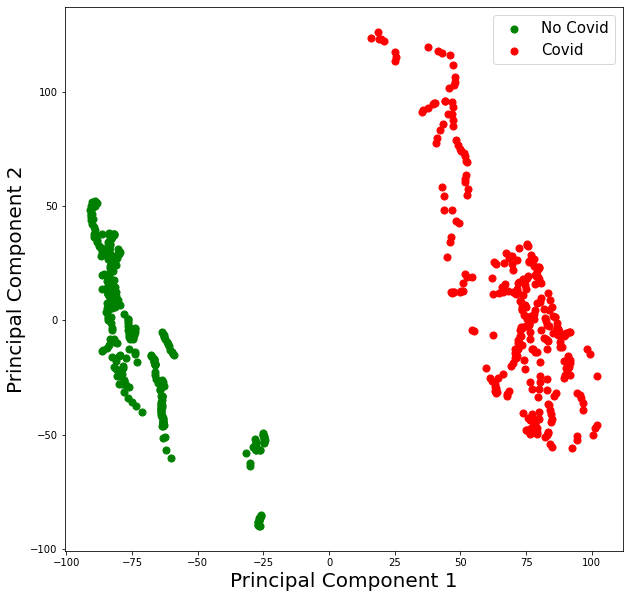

In [38]:
plt.figure(figsize=(10,10)) 
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)

targets=['No Covid','Covid']
colors=['g','r']
for target,color in zip(targets, colors):
    indicesToKeep= final_df['label']==target
    plt.scatter(data.loc[indicesToKeep, 0],
               data.loc[indicesToKeep, 1], c=color
                , s= 50)
plt.legend(targets, prop={"size":15})

In [87]:
# KMEANS+ PCA

In [42]:
## implementing K-Means with PCA data
from sklearn.cluster import KMeans
kmeans_pca= KMeans(n_clusters=2, init= 'k-means++', random_state=42)
kmeans_pca.fit(pc_ft)
y_kmeans= kmeans_pca.predict(pc_ft)

array([[ 7.22586105e+01,  3.17953204e+01, -3.94721001e+01, ...,
        -2.28524404e-02,  1.85454279e+00, -1.12752205e+00],
       [ 8.06600044e+01,  9.80973341e+00, -4.86440662e+01, ...,
        -4.10829402e+00,  3.81523156e-01,  4.65304685e-01],
       [ 8.06959918e+01,  1.62108993e+01, -5.13593293e+01, ...,
         3.27783687e+00, -1.86406496e+00, -2.03495563e-01],
       ...,
       [-8.10873993e+01, -2.12477318e+01,  5.96076526e+00, ...,
        -1.41557127e+00,  1.07943880e+00, -1.44601284e+00],
       [-8.28647104e+01,  3.63949351e+01, -3.26956467e+00, ...,
         1.82888066e-01, -3.75222329e-01, -3.05928946e-02],
       [-6.39876383e+01, -4.04648382e+01,  1.00493508e-02, ...,
         3.52766624e-01, -5.34509615e-01, -7.84226507e-03]])

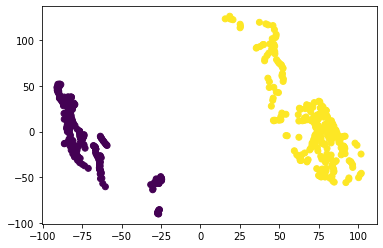

In [45]:
plt.scatter(pc_ft[:,0], pc_ft[:,1], c=y_kmeans)

In [58]:
##implementing K-Means without PCA

k_means_data= final_df.iloc[:,:16384]
kmeans=KMeans(n_clusters=2)
kmeans.fit(k_means_data)
ykmeans= np.array(kmeans.predict(k_means_data))



In [59]:
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [84]:
import numpy as np
A = np.array([[1,2,3],
             [4,5,6],
             [1,2,3]])
print(A[A > 3])

cluster1=ykmeans[ykmeans==1] 
cluster2=ykmeans[ykmeans==0]

[4 5 6]


In [85]:
cluster1.size,cluster2.size

(300, 300)